# Revisão de conceitos estatísticos I

Vamos explorar alguns conceitos estatísticos aplicados à análise de sinais.

In [1]:
# importar as bibliotecas necessárias
import numpy as np # arrays
import matplotlib.pyplot as plt # plots
plt.rcParams.update({'font.size': 14})
import IPython.display as ipd # to play signals
import sounddevice as sd

# Exemplo 1: Três pessoas lançam uma moeda 10 vezes

Assim, teremos um registro "temporal" do lançamento da moeda. Vamos dizer que 

- Ao conjunto de registros temporais chamamos de ***Ensemble***
- A cada $n$ em $n_{\text{eventos}}$, temos um ***evento***. Cada ***evento*** (cara ou coroa) tem associado a si uma ***variável aleatória***, definida como
    - Cara = 0
    - Coroa = 1

- O universo amostral é: $\Omega = (0, 1)$
- Podemos calcular a probavilidade do evento 'cara' tomando $p(\text{cara}) = n(\text{cara})/n_{\text{eventos}}$. Esta é uma visão frequentista do fenômeno.

Prob. de caras em p1 é de: 0.70
Prob. de caras em p2 é de: 0.50
Prob. de caras em p3 é de: 0.50


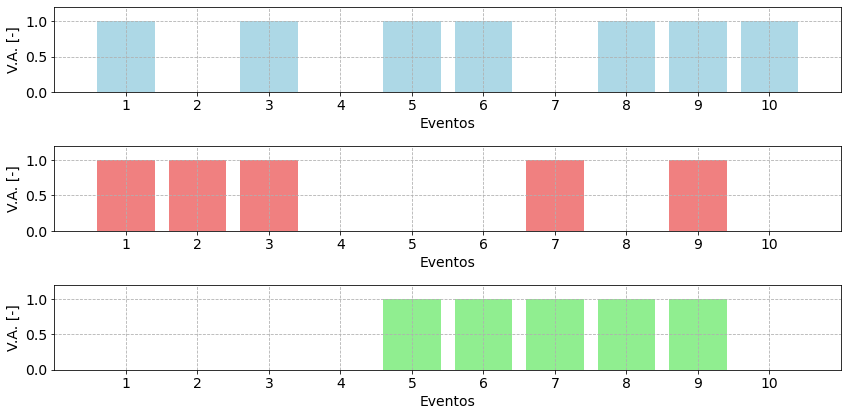

In [2]:
n_eventos = np.arange(1,11)
p1 = np.random.randint(2, size=len(n_eventos))
p2 = np.random.randint(2, size=len(n_eventos))
p3 = np.random.randint(2, size=len(n_eventos))

print("Prob. de caras em p1 é de: {:.2f}".format(len(p1[p1==1])/len(p1)))
print("Prob. de caras em p2 é de: {:.2f}".format(len(p2[p2==1])/len(p2)))
print("Prob. de caras em p3 é de: {:.2f}".format(len(p3[p3==1])/len(p3)))

plt.figure(figsize = (12,6))
plt.subplot(3,1,1)
plt.bar(n_eventos, p1, color = 'lightblue')
plt.xticks(n_eventos)
plt.grid(linestyle = '--', which='both')
plt.xlabel('Eventos')
plt.ylabel('V.A. [-]')
plt.xlim((0, len(n_eventos)+1))
plt.ylim((0, 1.2))

plt.subplot(3,1,2)
plt.bar(n_eventos, p2, color = 'lightcoral')
plt.xticks(n_eventos)
plt.grid(linestyle = '--', which='both')
plt.xlabel('Eventos')
plt.ylabel('V.A. [-]')
plt.xlim((0, len(n_eventos)+1))
plt.ylim((0, 1.2))

plt.subplot(3,1,3)
plt.bar(n_eventos, p3, color = 'lightgreen')
plt.xticks(n_eventos)
plt.grid(linestyle = '--', which='both')
plt.xlabel('Eventos')
plt.ylabel('V.A. [-]')
plt.xlim((0, len(n_eventos)+1))
plt.ylim((0, 1.2))
plt.tight_layout();

# Exemplo 2: Ruído aleatório com distribuição normal

Neste exemplo nós consideramos um sinal gerado a partir do processo de obter amostras de uma distribuição normal, dada por:

\begin{equation}
p(x) = \mathcal{N}(\mu_x, \sigma_x) = \frac{1}{\sqrt{2\pi}\sigma_x}\mathrm{e}^{-\frac{1}{2\sigma_x^2}(x-\mu_x)^2}
\end{equation}
em que $\mu_x$ é a média e $\sigma_{x}$ é o desvio padrão.

Imaginemos então, que a cada instante de tempo $t$, nós sorteamos um valor da distribuição normal.

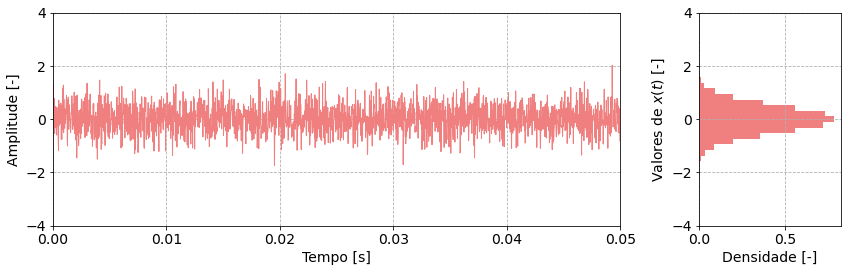

In [6]:
fs = 44100
time = np.arange(0,2, 1/fs)

# sinal
mu_x = 0
sigma_x = 0.5
xt = np.random.normal(loc = mu_x, scale = sigma_x, size=len(time))

# Figura
fig, axs = plt.subplots(1, 2, gridspec_kw={'width_ratios': [8, 2]}, figsize = (12, 4))
axs[0].plot(time, xt, '-b', linewidth = 1, color = 'lightcoral')
axs[0].grid(linestyle = '--', which='both')
axs[0].set_xlabel('Tempo [s]')
axs[0].set_ylabel('Amplitude [-]')
axs[0].set_xlim((0, 0.05))
axs[0].set_ylim((-4, 4))

axs[1].hist(xt, density = True, orientation='horizontal', bins=np.linspace(-4*sigma_x, 4*sigma_x, 20), color = 'lightcoral')
axs[1].grid(linestyle = '--', which='both')
axs[1].set_xlabel('Densidade [-]')
axs[1].set_ylabel(r'Valores de $x(t)$ [-]')
axs[1].set_ylim((-4, 4))




plt.tight_layout()

ipd.Audio(xt, rate=fs) # load a NumPy array